# Preprocess the Fitzpatrick 17k dataset

We assume you have already downloaded the fitzpatrick17k.csv file from the official repo and have downloaded the images (the easiest way is to fill in the request form on the website and download the zip file.)

Now, let's download the data and generate the splits 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# where we saved fitzpatrick17k.csv, you should also have extracted the images
# to DATA_DIR/data/finalfitz17k
DATA_DIR = "/mnt/fitzpatrick17k/"
SPLIT_DIR = "../splits/fitzpatrick17k/"

os.makedirs(SPLIT_DIR, exist_ok=True)
df = pd.read_csv(os.path.join(DATA_DIR, "fitzpatrick17k.csv"))
df.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...


In [3]:
from skimage.io import imread
from skimage.io import imsave
from skimage.transform import resize
from tqdm import tqdm

print("adding path column")

df["PathRaw"] = df["md5hash"].apply(lambda x: os.path.join("data", "finalfitz17k", f"{x}.jpg"))
print(df.shape)
df.head()

print("preprocessing to 224x224")

preproc_dir = os.path.join(DATA_DIR, "preproc_224x224")
os.makedirs(preproc_dir, exist_ok=True)

for i in tqdm(range(df.shape[0])):
    out_path = os.path.join(preproc_dir, df.iloc[i]["md5hash"] + ".jpg")

    if os.path.exists(out_path):
        continue
    img = imread(os.path.join(DATA_DIR, df.iloc[i]["PathRaw"]))
    img = resize(img, (224, 224), preserve_range=True)
    imsave(out_path, img.astype(np.uint8)) 

df["Path"] = df["md5hash"].apply(lambda x: os.path.join("preproc_224x224", f"{x}.jpg"))




adding path column
(16577, 10)
preprocessing to 224x224


100%|██████████| 16577/16577 [00:01<00:00, 16325.75it/s]


In [4]:
print("checking that all images exist")

from tqdm import tqdm

num_missing = 0

for path in tqdm(df["Path"]):
    if not os.path.exists(os.path.join(DATA_DIR, path)):
        num_missing += 1

print(f"num missing: {num_missing}")



checking that all images exist


100%|██████████| 16577/16577 [00:00<00:00, 247009.51it/s]

num missing: 0


In [5]:
print("binarizing sensitive attribute")


print(f"number of images with each skin type: \n{df['fitzpatrick_scale'].value_counts()}")

# remove the images with skin type -1
df = df[df["fitzpatrick_scale"] != -1]

# binarize the skin type 1,2,3 -> 0, 4,5,6 -> 1
df["SkinType"] = df["fitzpatrick_scale"].apply(lambda x: 0 if x < 4 else 1)

print(f"number of images with each label: \n{df['SkinType'].value_counts()}")

print(df.shape)
df.head()

binarizing sensitive attribute
number of images with each skin type: 
 2    4808
 3    3308
 1    2947
 4    2781
 5    1533
 6     635
-1     565
Name: fitzpatrick_scale, dtype: int64
number of images with each label: 
0    11063
1     4949
Name: SkinType, dtype: int64
(16012, 12)


/tmp/ipykernel_774873/1278677056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SkinType"] = df["fitzpatrick_scale"].apply(lambda x: 0 if x < 4 else 1)


,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum,PathRaw,Path,SkinType
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,data/finalfitz17k/5e82a45bc5d78bd24ae9202d1944...,preproc_224x224/5e82a45bc5d78bd24ae9202d194423...,0
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,data/finalfitz17k/fa2911a9b13b6f8af79cb700937c...,preproc_224x224/fa2911a9b13b6f8af79cb700937cc1...,0
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,data/finalfitz17k/d2bac3c9e4499032ca8e9b07c7d3...,preproc_224x224/d2bac3c9e4499032ca8e9b07c7d3bc...,0
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,data/finalfitz17k/0a94359e7eaacd7178e06b282377...,preproc_224x224/0a94359e7eaacd7178e06b28237777...,0
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,data/finalfitz17k/a39ec3b1f22c08a421fa20535e03...,preproc_224x224/a39ec3b1f22c08a421fa20535e037b...,0


In [6]:
print("creating binary label")

print(f"number of images with each condition: \n{df['three_partition_label'].value_counts()}")

# benign and non-neoplastic -> 0, malignant -> 1
df["binaryLabel"] = df["three_partition_label"].apply(lambda x: 1 if x == "malignant" else 0)

print(f"number of images with each label: \n{df['binaryLabel'].value_counts()}")

print(df.shape)
df.head()

creating binary label
number of images with each condition: 
non-neoplastic    11692
benign             2160
malignant          2160
Name: three_partition_label, dtype: int64
number of images with each label: 
0    13852
1     2160
Name: binaryLabel, dtype: int64
(16012, 13)


/tmp/ipykernel_774873/1801249354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["binaryLabel"] = df["three_partition_label"].apply(lambda x: 1 if x == "malignant" else 0)


,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum,PathRaw,Path,SkinType,binaryLabel
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,data/finalfitz17k/5e82a45bc5d78bd24ae9202d1944...,preproc_224x224/5e82a45bc5d78bd24ae9202d194423...,0,0
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,data/finalfitz17k/fa2911a9b13b6f8af79cb700937c...,preproc_224x224/fa2911a9b13b6f8af79cb700937cc1...,0,0
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,data/finalfitz17k/d2bac3c9e4499032ca8e9b07c7d3...,preproc_224x224/d2bac3c9e4499032ca8e9b07c7d3bc...,0,0
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,data/finalfitz17k/0a94359e7eaacd7178e06b282377...,preproc_224x224/0a94359e7eaacd7178e06b28237777...,0,0
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,data/finalfitz17k/a39ec3b1f22c08a421fa20535e03...,preproc_224x224/a39ec3b1f22c08a421fa20535e037b...,0,0


In [7]:
print("creating train, val, test splits")

from sklearn.model_selection import train_test_split

# split 80/10/10
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

assert isinstance(train_df, pd.DataFrame)
assert isinstance(val_df, pd.DataFrame)
assert isinstance(test_df, pd.DataFrame)

print(f"train: {train_df.shape}, val: {val_df.shape}, test: {test_df.shape}")

creating train, val, test splits
train: (12809, 13), val: (1601, 13), test: (1602, 13)


In [8]:
print("saving splits")

train_df.to_csv(os.path.join(SPLIT_DIR, "train.csv"), index=False)
val_df.to_csv(os.path.join(SPLIT_DIR, "val.csv"), index=False)
test_df.to_csv(os.path.join(SPLIT_DIR, "test.csv"), index=False)

saving splits


## Splits are done, now visualise the data and get some summary statistics

sanity check
Image shape: (224, 224, 3), Image type: uint8, Image range: 0 - 213, Skin type: 0


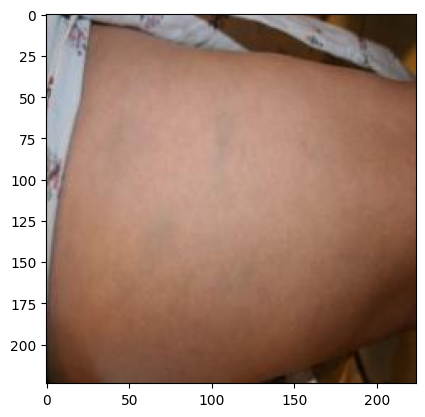

In [9]:
print("sanity check")
img = plt.imread(os.path.join(DATA_DIR, df["Path"].values[0]))  # type: ignore
print(
    f"Image shape: {img.shape}, Image type: {img.dtype}, Image range: {img.min()} -"
    f" {img.max()}, Skin type: {df['SkinType'].values[0]}"
)
plt.imshow(img)

In [10]:
num_images = df.shape[0]
print(f"Number of images: {num_images}")

num_type_0 = len(df[df["SkinType"] == 0])
print(f"Number of type 0: {num_type_0}")

num_type_1 = len(df[df["SkinType"] == 1])
print(f"Number of type 1: {num_type_1}")

assert num_type_0 + num_type_1 == num_images


num_benign = len(df[df["binaryLabel"] == 0])
print(f"Number of Benign: {num_benign}")

num_malignant = len(df[df["binaryLabel"] == 1])
print(f"Number of Malignant: {num_malignant}")

assert num_benign + num_malignant == num_images

Number of images: 16012
Number of type 0: 11063
Number of type 1: 4949
Number of Benign: 13852
Number of Malignant: 2160


In [13]:

print(f"percentage of type i-iii: {num_type_0 / num_images * 100}")
print(f"percentage of type iv-vi: {num_type_1 / num_images * 100}")

num_type_0_positive_label = len(df[df["SkinType"] == 0][df["binaryLabel"] == 1])
num_type_0_negative_label = len(df[df["SkinType"] == 0][df["binaryLabel"] == 0])
assert num_type_0_positive_label + num_type_0_negative_label == num_type_0

print(f"prevalence of positive class in type i-iii: {num_type_0_positive_label / num_type_0 * 100}")

num_type_1_positive_label = len(df[df["SkinType"] == 1][df["binaryLabel"] == 1])
num_type_1_negative_label = len(df[df["SkinType"] == 1][df["binaryLabel"] == 0])
assert num_type_1_positive_label + num_type_1_negative_label == num_type_1

print(f"prevalence of positive class in type iv-vi: {num_type_1_positive_label / num_type_1 * 100}")


percentage of type i-iii: 69.09193105171121
percentage of type iv-vi: 30.908068948288786
prevalence of positive class in type i-iii: 14.923619271445359
prevalence of positive class in type iv-vi: 10.284906041624572


/tmp/ipykernel_774873/561769815.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_type_0_positive_label = len(df[df["SkinType"] == 0][df["binaryLabel"] == 1])
/tmp/ipykernel_774873/561769815.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_type_0_negative_label = len(df[df["SkinType"] == 0][df["binaryLabel"] == 0])
/tmp/ipykernel_774873/561769815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_type_1_positive_label = len(df[df["SkinType"] == 1][df["binaryLabel"] == 1])
/tmp/ipykernel_774873/561769815.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_type_1_negative_label = len(df[df["SkinType"] == 1][df["binaryLabel"] == 0])
